In [229]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [230]:
from sklearn.datasets import load_boston
boston =  load_boston()
feature_name = boston.feature_names
X = boston.data
Y = boston.target

In [231]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [232]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [234]:
feature_names = []

for f in feature_name:
  feature_names.append(f)
feature_names.append('MEDV')

In [235]:
boston_dataset = np.hstack((X,np.reshape(Y,(len(Y),1))))
boston_df = pd.DataFrame(boston_dataset,columns = feature_names)

In [236]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [237]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [238]:
def find_correlation(X):
  correlation_matrix=np.zeros((X.shape[1],X.shape[1]))
  mean_features=[X[:,j].sum(axis=0)/len(X) for j in range(X.shape[1])]
  # print(mean_features)
  
  def correlation_calculation_formula(vecX,vecY,X_mean,Y_mean):
    numerator=np.sum((np.array(vecX)-X_mean)*(np.array(vecY)-Y_mean))
    denominator=np.sqrt(np.sum((np.array(vecX)-X_mean)**2) * np.sum((np.array(vecY)-Y_mean)**2))
    correlation_coff=numerator/denominator
    return correlation_coff

  for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
      correlation_matrix[i][j]=correlation_calculation_formula(X[:,i],X[:,j],mean_features[i],mean_features[j])
  # print(correlation_matrix)
  return correlation_matrix 

corr_matrix=find_correlation(boston_dataset)
  


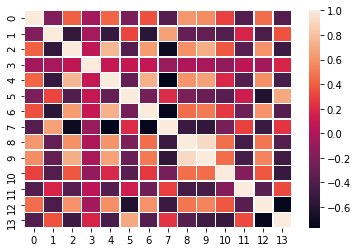

In [239]:
ax = sns.heatmap(corr_matrix , linewidth = 0.5)# ,annot=True)#, cmap = 'autumn')

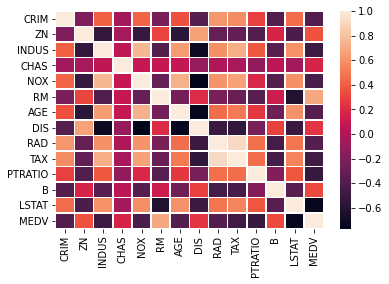

In [240]:
ax = sns.heatmap(pd.DataFrame(boston_df).corr(), linewidth = 0.5)#, annot=True) #, cmap = 'autumn' )

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)

(404, 13)
(404,)


# Psuedo-inverse

In [242]:
A = np.dot(X_train.T,X_train)

In [243]:
print(A.shape)

(13, 13)


In [244]:
A_pseudo_inverse = np.linalg.pinv(A)
print(A_pseudo_inverse.shape)

(13, 13)


In [245]:
A_pseudo_inverse = np.linalg.pinv(A)
print(A_pseudo_inverse.shape)

(13, 13)


In [246]:
b = np.dot(X_train.T,np.reshape(Y_train,(len(Y_train),1)))#np.matmul(X_train,np.reshape(Y_train,(len(Y_train),1)))
b.shape

(13, 1)

In [247]:
 W = np.dot(A_pseudo_inverse,b)
 W.shape

(13, 1)

In [248]:
def mean_squarred_error_calculation(y_pred,y_true):

  error = (1/len(y_true)) * (np.sum((y_pred-y_true)**2))

  return error



In [249]:
y_pred_train = np.dot(X_train,W)
y_pred_test = np.dot(X_test,W)


Y_Pred_Train = []
Y_Pred_Test = []

for i in y_pred_train:
  Y_Pred_Train.append(i[0])

for j in y_pred_test:
  Y_Pred_Test.append(j[0])


In [250]:
print('Training MSE:', mean_squarred_error_calculation(Y_Pred_Train,Y_train))
print('Training RMSE:', np.sqrt(mean_squarred_error_calculation(Y_Pred_Train,Y_train)))

Training MSE: 24.96112055223666
Training RMSE: 4.996110542435652


In [251]:
RSS_sum_of_squares_of_residual_errors = np.sum((Y_train-Y_Pred_Train)**2)
TSS_total_sum_of_errors = np.sum((Y_train - Y_train.mean(axis = 0))**2)
R2_score = 1 - (RSS_sum_of_squares_of_residual_errors / TSS_total_sum_of_errors)
print('R2_score:',R2_score)

R2_score: 0.709422266854064


**Testing Phase**

In [252]:
print('Testing MSE:', mean_squarred_error_calculation(Y_Pred_Test,Y_test))
print('Testing RMSE:', np.sqrt(mean_squarred_error_calculation(Y_Pred_Test,Y_test)))

Testing MSE: 22.75666652645474
Testing RMSE: 4.77039479775571


In [253]:
RSS_sum_of_squares_of_residual_errors = np.sum((Y_test-Y_Pred_Test)**2)
TSS_total_sum_of_errors = np.sum((Y_test - Y_test.mean(axis = 0))**2)
R2_score = 1 - (RSS_sum_of_squares_of_residual_errors / TSS_total_sum_of_errors)
print('R2_score:',R2_score)

R2_score: 0.7093429293628457


#Gradient Descenet

epoch: 0   loss: 598.7784405940595
epoch: 1   loss: 568.2619949041555
epoch: 2   loss: 540.7004023400413
epoch: 3   loss: 515.5810018231042
epoch: 4   loss: 492.5013122541778
epoch: 5   loss: 471.1442364468577
epoch: 6   loss: 451.2588930395076
epoch: 7   loss: 432.6457970507752
epoch: 8   loss: 415.1454006377128
epoch: 9   loss: 398.6292303632679
epoch: 10   loss: 382.99303092223425
epoch: 11   loss: 368.1514594326998
epoch: 12   loss: 354.0339780520309
epoch: 13   loss: 340.58167275931964
epoch: 14   loss: 327.7447880194016
epoch: 15   loss: 315.48081484777265
epoch: 16   loss: 303.7530067301513
epoch: 17   loss: 292.5292263867429
epoch: 18   loss: 281.7810484191063
epoch: 19   loss: 271.4830599123295
epoch: 20   loss: 261.6123142268776
epoch: 21   loss: 252.14790338370963
epoch: 22   loss: 243.07062230350044
epoch: 23   loss: 234.36270423175813
epoch: 24   loss: 226.00761137248642
epoch: 25   loss: 217.98986837758855
epoch: 26   loss: 210.29492913992365
epoch: 27   loss: 202.9090695

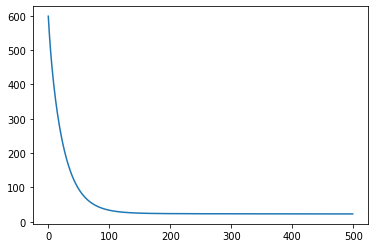

In [210]:
theta=[0 for t in range(0,X_train.shape[1]+1)]
alpha = 0.01

def hypothesis_function(x,theta):
 
  hypothesis = theta[0] + np.sum((theta[1:] * x),axis=1)
  
  return hypothesis


def cost_function(y,hypothesis):

  cost = (1/len(y)) * (np.sum((hypothesis-y)**2))

  return cost 



def predict(x,theta):

  y_pred = theta[0] + np.sum((theta[1:] * x),axis=1)

  return y_pred



def linear_regression_gradient_descent(x,y,theta,alpha):
  
  hypothesis=hypothesis_function(x,theta)
  theta[0] = theta[0] - alpha * (2/len(x)) * (np.sum((hypothesis-y)*1))
  
  for j in range(0,x.shape[1]):
    theta[j+1] = theta[j+1] - alpha * (2/len(x)) * (np.sum((hypothesis-y)*x[:,j]))

  return theta



#epoch 0

hypothesis=hypothesis_function(X_train,theta)
cost=cost_function(Y_train,hypothesis)

print("epoch:",0," ","loss:",cost)

##

dic_theta=[]
dic_loss=[]
dic_hyp=[]

dic_theta.append(theta)
dic_loss.append(cost)
dic_hyp.append(hypothesis)

# img_array=[]

num_epochs = 500

for epoch in range(1,num_epochs):

  theta = linear_regression_gradient_descent(X_train,Y_train,theta,alpha)
  hypothesis = hypothesis_function(X_train,theta)
  cost=cost_function(Y_train,hypothesis)

  print("epoch:",epoch," ","loss:",cost)

  dic_theta.append(theta)
  dic_loss.append(cost)
  dic_hyp.append(hypothesis)

# print(predict(X_train,theta))


epochs=np.arange(0,num_epochs)
plt.plot(epochs,dic_loss)





In [211]:
y_train_pred = predict(X_train,theta)
print(y_train_pred)

[14.01487531 44.11066547  4.47563695 22.45105301 18.14299706 24.42238856
 29.54631542 18.41481083 28.27715061 24.11164518 20.42120044 32.57202386
 19.61819401 11.59382731 22.01197028 17.09390593 18.68958913 16.27114281
 21.39842584 34.65872994 21.91746864 20.18033306 23.90261518 26.19554676
 20.78575163 23.92795729 24.31129678 40.39339258 40.76358619 29.12637631
 12.81146369 16.18096806 18.15459728 21.33127278 15.95123336  5.69617166
 23.8988567  31.12311601 23.06702461 20.53577757 16.35790701 22.60700247
 34.79049125 26.62175642 30.95067804 17.50980846 22.86790221 29.50122434
 13.41053843 35.32442092 11.11668604 13.43936334 27.11875495 30.7222542
 13.12426443 24.64699052 29.08186748 32.06250681 15.81988142 30.99733125
  7.56789855 33.84088186 25.25363137 20.56918505 15.57499814 12.71294577
 30.96950399 15.3877313  23.76360537 20.75656664 13.90465661 20.79907137
 13.69738281 21.48469961 22.56035293 33.34226127 22.60411365 16.26589392
 31.19473534 40.05547874 26.58014558 25.22248799 16.

In [212]:
# metrics on train set

print('MSE:', cost_function(Y_train,y_train_pred))
print('RMSE:', np.sqrt(cost_function(Y_train,y_train_pred)))
RSS_sum_of_squares_of_residual_errors = np.sum((Y_train-y_train_pred)**2)
TSS_total_sum_of_errors = np.sum((Y_train - Y_train.mean(axis = 0))**2)
R2_score = 1 - (RSS_sum_of_squares_of_residual_errors / TSS_total_sum_of_errors)
print('R2_score:',R2_score)




MSE: 22.78280199937296
RMSE: 4.7731333523559725
R2_score: 0.7347805381638891


**Testing Phase**

In [213]:
y_test_pred = predict(X_test,theta)
y_test_pred

array([37.34435904, 31.07663036, 27.31707351,  5.20434001, 35.12096616,
        5.71542419, 27.72489504, 31.71909305, 27.07493407, 22.38242648,
       32.41118143, 21.24334936, 23.56817968, 32.54293515, 27.85469428,
       15.70431861, -0.53456435, 19.21093179, 14.16261688, 13.79586594,
        4.11089457, 20.23851418, 38.0299953 , 24.29686283, 31.36489305,
       11.20640678, 25.02584523, 23.9190132 , 22.56366646, 22.09270149,
       13.372076  ,  9.00658465, 18.1592105 , 22.7041932 , 28.58258096,
       19.54492175, 30.13670218,  8.59857372, 41.01907316, 34.0617112 ,
       20.52343482,  2.91465829, 29.48488577, 12.08334197, 26.71276317,
       30.99246861, -6.19172242, 18.02123809, 21.71727271, 12.9745217 ,
       20.8913459 , 19.36701156, 23.99605689, 12.98350909, 17.82144879,
       25.53578191, 35.46616071, 15.29383697, 27.94309239, 20.76261285,
       20.85543292, 25.83555943, 15.04635105, 33.04443527, 23.64508883,
       12.94453761, 19.67352269, 24.59380609, 21.42231682, 21.58

In [214]:
Y_test


array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

In [215]:
# metrics on test set

print('MSE:', cost_function(Y_test,y_test_pred))
print('RMSE:', np.sqrt(cost_function(Y_test,y_test_pred)))
RSS_sum_of_squares_of_residual_errors = np.sum((Y_test-y_test_pred)**2)
TSS_total_sum_of_errors = np.sum((Y_test - Y_test.mean(axis = 0))**2)
R2_score = 1 - (RSS_sum_of_squares_of_residual_errors / TSS_total_sum_of_errors)
print('R2_score:',R2_score)



MSE: 20.657849028347588
RMSE: 4.545090651279421
R2_score: 0.7361498496599224
